# Basic Tutorial: Reeb graph class

In this notebook, we'll walk through the basic functionality of the `cereeberus.ReebGraph` class. See [here](../modules/reeb/reebgraph.rst) for full documentation.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# The main class for the Reeb Graph
from cereeberus import ReebGraph

# Some built in example graphs
import cereeberus.data.ex_reebgraphs as ex_rg

A Reeb graph consists of a graph $G$ with a function $f:G \to \mathbb{R}$ which is monotone on the edges. For our encoding purposes, we are going to assume that the function is defined by providing the function value on the vertices
$$
f:V(G) \to \mathbb{R}
$$
with the property that for any edge $e = (u,v)$, $f(u) \neq f(v)$. 

In this tutorial, we go over the basic structure of the `cereeberus.ReebGraph` class. 

## Basic operations on a Reeb graph

We're going to start with an empty Reeb graph.

In [2]:
R = ReebGraph()
print(R)

ReebGraph with 0 nodes and 0 edges.


Let's add some vertices. Of course, we have to be sure to specify the function value at the same time. 

In [3]:
R.add_node('A', f_vertex = 3.2)
R.add_node('B', f_vertex = 1.7)
R.add_node('C', f_vertex = 0)
R.add_node('D', f_vertex = -2)
R.add_node('E', f_vertex = np.pi)

print(R)

ReebGraph with 5 nodes and 0 edges.


We can also add some edges to our Reeb graph. Note that the Reeb graph allows for multiple edges between two vertices.

In [4]:
R.add_edge('A','B')
R.add_edge('B','C')
R.add_edge('A','D')
R.add_edge('D','E')
R.add_edge('D','B')
R.add_edge('D','B')


print(R)

ReebGraph with 5 nodes and 6 edges.


The function values are stored in the dictionary `R.f`. Below we can see function values for some of the vertices we just added. 

In [5]:
print(f"f(A) = {R.f['A']}")
print(f"f(B) = {R.f['B']}")
print(f"f(E) = {R.f['E']}")

f(A) = 3.2
f(B) = 1.7
f(E) = 3.141592653589793


We can take a look at the Reeb graph using the built in drawing function. The `cpx` input controls loopiness for the drawing. The `R.set_pos_from_f` randomly sets the drawing positions. In this case, we picked `seed = 2` to make a reasonable graph, however, this command is unnecessary unless you want more control over drawing locations. 

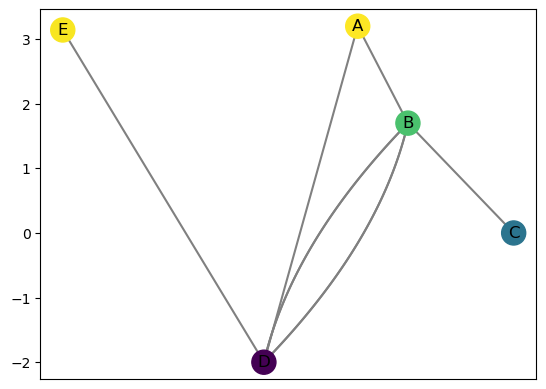

In [6]:
R.set_pos_from_f(seed = 2)
R.draw(cpx = 3)

You can manually control the drawing locations for the vertices if you want to. The drawing locations are held in the dictionary `R.pos_f`. So I can just move vertex `A` over a bit to the left to make my drawing a touch nicer. The second coordinate is always the function value `R.f['A']`, but we can change the first coordinate.  Note that later when adding vertices and edges, this will likely be reset so you won't likely want to use this tweaking much. 

Drawing location for A: (0.14133460941762915, 3.2)


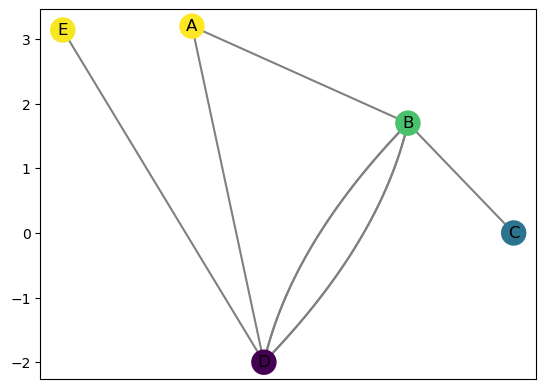

In [7]:
print(f'Drawing location for A: {R.pos_f["A"]}')
R.pos_f['A'] = (-.5,R.f['A'])
R.draw(cpx=3)

We can also subdivde edges. Note that in a Reeb graph, because we think of an edge as being a copy of the unit interval, the result is considered the same Reeb graph. So, we can add a vertex to an edge $(u,v)$ at any function value $f(u) < a< f(b)$.

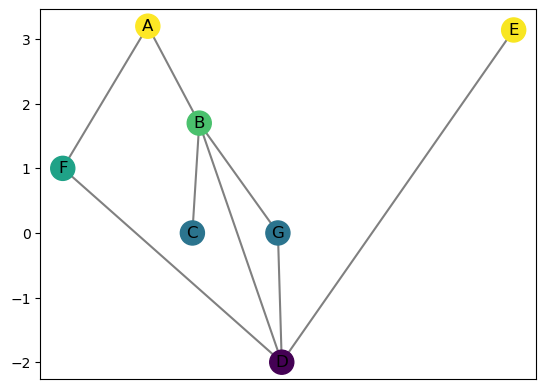

In [8]:
R.subdivide_edge('A','D','F',1)
R.subdivide_edge('B','D','G',0)

# Just for drawing purposes
R.set_pos_from_f(seed = 42)
R.draw(cpx=3)

These so-called regular vertices can also be removed. Either by using the command `R.remove_regular_vertex(v)` (note the difference between removing a regular vertex and the `R.remove_node` command which deletes a vertex and all adjacent edges from the Reeb graph), or by removing all at once as follows. 

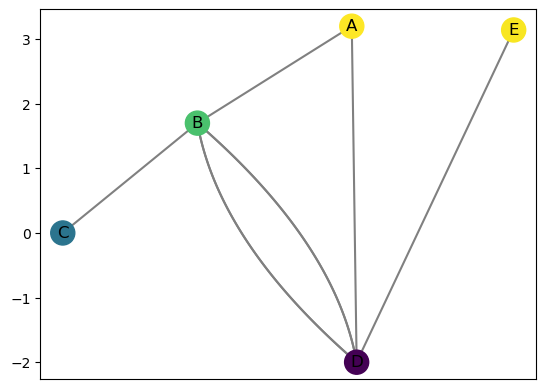

In [9]:
R.remove_all_regular_vertices()

R.set_pos_from_f(seed = 1)
R.draw(cpx=3)

Note that if you add an edge between two vertices at the same function value, the Reeb graph will actually merge the two vertices into one. First I'm going to put back in an extra vertex on the edge $(D,E)$ at the same function value as $C$.

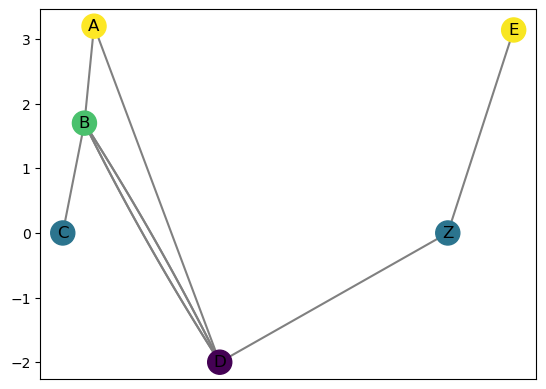

In [10]:
R.subdivide_edge('D','E','Z',R.f['C'])
R.draw()

Then if I try to add the edge $(Z,C)$, it will merge the two endpoints, keeping the name as the first vertex I passed in. 

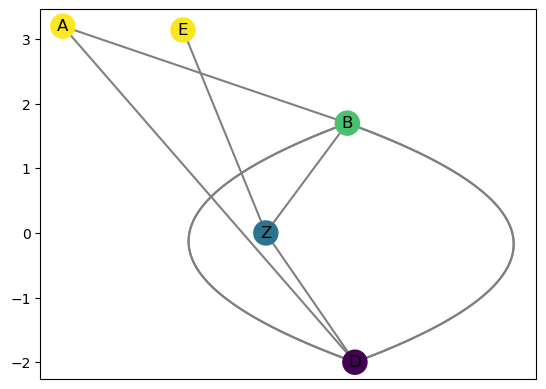

In [11]:
R.add_edge('Z','C')
R.draw(cpx = 3)

## Subgraphs and slices of the Reeb graph
Let's get a new Reeb graph to work with. In this case, we're going to use one of the example Reeb graphs provided in `cereeberus.data.ex_reebgraphs`. I'm also going to add a few edges for fun. 

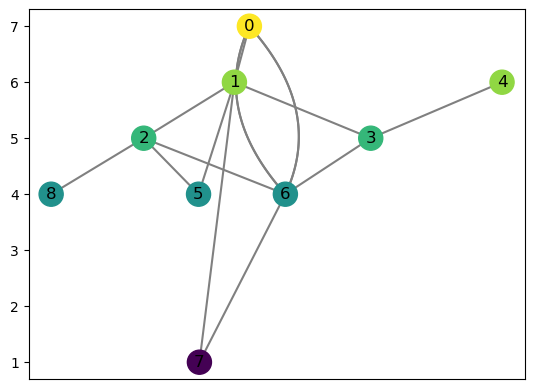

In [12]:
R = ex_rg.dancing_man()
R.add_node(8,4)
R.add_edges_from(((6,0), (6,0),(7,1), (5,1), (8,2)))
R.set_pos_from_f(seed = 0)
R.draw(cpx = 3)


We can get the induced sub-Reeb-graph by providing a collection of vertices. This returns the portion of the Reeb graph with vertices from the set, and edges are included only if both endpoints are in the set.  

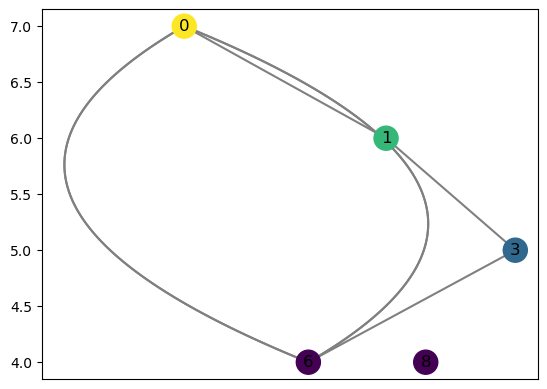

In [13]:
v_list = [0,1,8,6,3]
H = R.induced_subgraph(v_list)
H.draw(cpx = 3)


We can also take a slice of the Reeb graph, defined as the inverse image $f^{-1}(a,b)$ for some interval $(a,b) \subset \mathbb{R}$. Note that this is not the same thing as taking the induced graph of the set of vertices $\{v \mid f(v) \in (a,b)\}$ since we treat edges as being topologically equivalent to an interval. So taking the slice is done by adding spare vertices for edges that cross this interval.

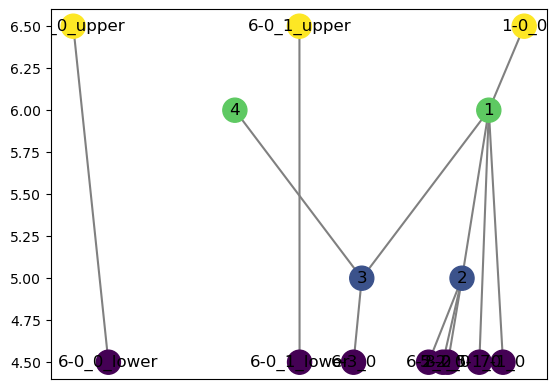

In [14]:
H = R.slice(4.5,6.5)
H.set_pos_from_f(seed = 0)
H.draw()

Although the drawing doesn't make it particularly obvious, we can do things like check the number of connected components. 

In [15]:
print(f'There are {H.number_connected_components()} components in this Reeb Graph')

There are 3 components in this Reeb Graph


Or we can extract them individually:

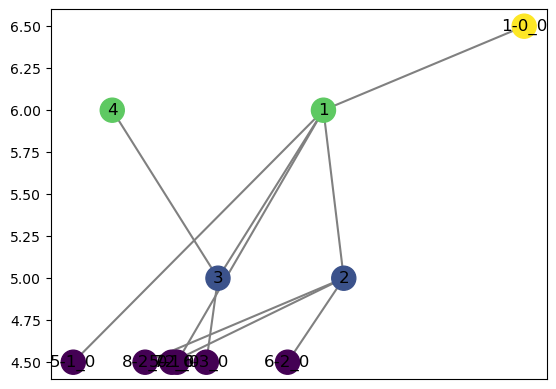

In [16]:
H_components = [H.induced_subgraph(c) for c in H.connected_components()]

H_components[0].draw()